# Task5 : Traffic sign classification

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [12]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [13]:
cur_path = "C:\\Users\\rohan\\Task5 Traffic sign classification\\"

In [14]:
# Iterating through images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [15]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [16]:
# Splitting data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [17]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
# Building the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [19]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainig and Validation
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("test_model.keras")

Epoch 1/15
981/981 [==============================] - 58s 58ms/step - loss: 1.7692 - accuracy: 0.5341 - val_loss: 0.5955 - val_accuracy: 0.8712
Epoch 2/15
981/981 [==============================] - 58s 59ms/step - loss: 0.6943 - accuracy: 0.7964 - val_loss: 0.2046 - val_accuracy: 0.9462
Epoch 3/15
981/981 [==============================] - 57s 58ms/step - loss: 0.4906 - accuracy: 0.8560 - val_loss: 0.1671 - val_accuracy: 0.9583
Epoch 4/15
981/981 [==============================] - 58s 59ms/step - loss: 0.3952 - accuracy: 0.8847 - val_loss: 0.1212 - val_accuracy: 0.9685
Epoch 5/15
981/981 [==============================] - 59s 60ms/step - loss: 0.3514 - accuracy: 0.8969 - val_loss: 0.1028 - val_accuracy: 0.9718
Epoch 6/15
981/981 [==============================] - 58s 59ms/step - loss: 0.3272 - accuracy: 0.9080 - val_loss: 0.1052 - val_accuracy: 0.9707
Epoch 7/15
981/981 [==============================] - 60s 62ms/step - loss: 0.3072 - accuracy: 0.9133 - val_loss: 0.0698 - val_accuracy:

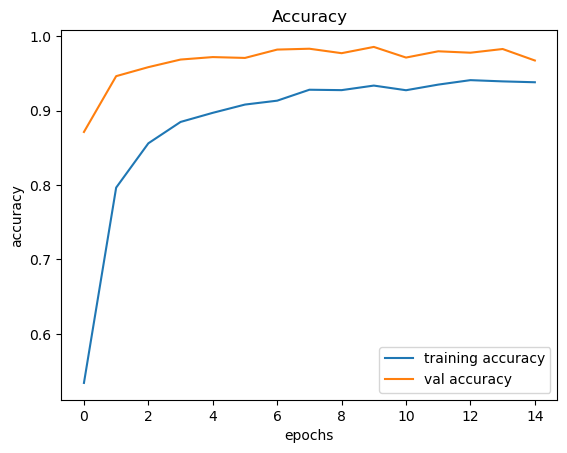

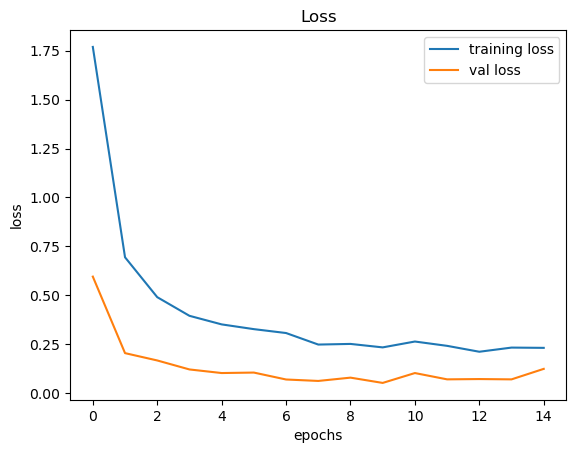

In [20]:
# plotting graphs to see the accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
# Model Testing (using test dataset)
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('C:\\Users\\rohan\\Task5 Traffic sign classification\\Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

In [30]:
# Model Testing (using test dataset)
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('C:\\Users\\rohan\\Task5 Traffic sign classification\\Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test).argmax(axis=1)


395/395 [==============================] - 7s 17ms/step


In [32]:
# Printing Model accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.931353919239905


In [33]:
# Saving the model
os.remove('test_model.keras') # removing the old file
model.save('traffic_classifier.keras')

In [39]:
pred

array([16,  1, 38, ..., 36,  7, 10], dtype=int64)

1/1 [==============================] - 0s 43ms/step
Predicted sign: [[9.0222135e-14 5.3900240e-09 3.0736338e-09 4.5962966e-11 3.8379040e-11
  1.0916412e-11 3.0738482e-18 1.0780904e-14 5.2311849e-11 7.5802286e-06
  4.8931338e-11 1.2424783e-13 3.9015358e-06 9.9983156e-01 3.9222403e-10
  1.5422965e-04 1.9021888e-14 1.4110974e-07 7.9004537e-12 5.3670051e-16
  2.9756544e-13 9.8786700e-15 8.0500086e-12 2.6993024e-12 6.5269336e-16
  4.2882562e-08 2.7835148e-13 9.4736512e-17 2.0805952e-11 9.7002906e-10
  3.2840196e-13 8.1551551e-17 2.4531464e-06 6.2269130e-13 4.0082812e-11
  8.0712000e-11 3.1887172e-13 7.7049042e-17 4.5609503e-09 5.6173265e-12
  7.3510954e-08 1.1937235e-08 2.3874921e-13]]


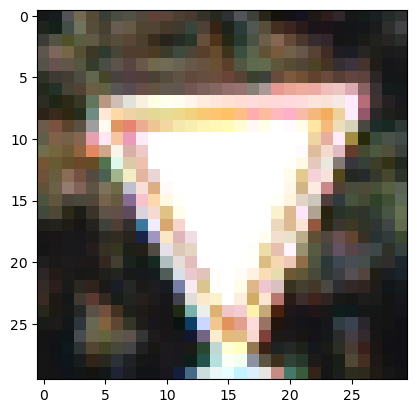

In [40]:
plt.imshow(X_test[980]) 

prediction = str(model.predict(X_test[980].reshape(1, 30, 30, 3)))
print("Predicted sign: "+ prediction) 

In [41]:
prediction


'[[9.0222135e-14 5.3900240e-09 3.0736338e-09 4.5962966e-11 3.8379040e-11\n  1.0916412e-11 3.0738482e-18 1.0780904e-14 5.2311849e-11 7.5802286e-06\n  4.8931338e-11 1.2424783e-13 3.9015358e-06 9.9983156e-01 3.9222403e-10\n  1.5422965e-04 1.9021888e-14 1.4110974e-07 7.9004537e-12 5.3670051e-16\n  2.9756544e-13 9.8786700e-15 8.0500086e-12 2.6993024e-12 6.5269336e-16\n  4.2882562e-08 2.7835148e-13 9.4736512e-17 2.0805952e-11 9.7002906e-10\n  3.2840196e-13 8.1551551e-17 2.4531464e-06 6.2269130e-13 4.0082812e-11\n  8.0712000e-11 3.1887172e-13 7.7049042e-17 4.5609503e-09 5.6173265e-12\n  7.3510954e-08 1.1937235e-08 2.3874921e-13]]'

In [42]:
sign_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)\
', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)\
', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons\
', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles\
', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left\
', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right\
', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing \
', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits\
', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right\
', 'Keep left', 'Roundabout mandatory', 'End of no passing','End of no passing by vehicles over 3.5 metric tons']